In [1]:
from PIL import Image
import glob
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

In [3]:
#carregando imagem

img_G = mpimg.imread('mdb001.pgm')
img_D = mpimg.imread('mdb003.pgm')
img_F = mpimg.imread('mdb005.pgm')

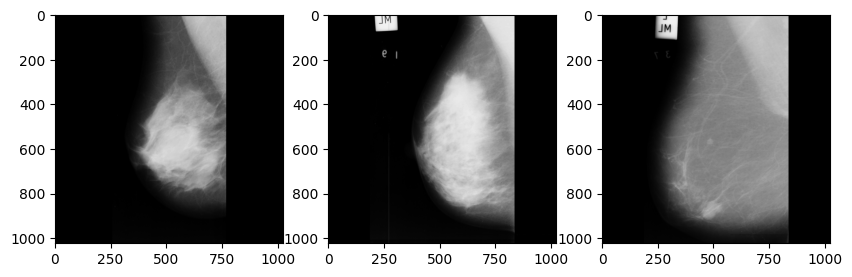

In [8]:
fig, ax = plt.subplots(1,3, figsize = (10,3))
im1 = ax[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = ax[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = ax[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)

plt.show()

In [22]:
def filtro_kmeans(img, cluster):
    vectorized = img.reshape((-1, 1))

    kmeans = KMeans(n_clusters=cluster, random_state=0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_data = segmented_data.reshape((img.shape))
    return segmented_data

In [24]:
clusters = 3

img_g_segmentada = filtro_kmeans(img_G, clusters)
img_D_segmentada = filtro_kmeans(img_D, clusters)
img_F_segmentada = filtro_kmeans(img_F, clusters)

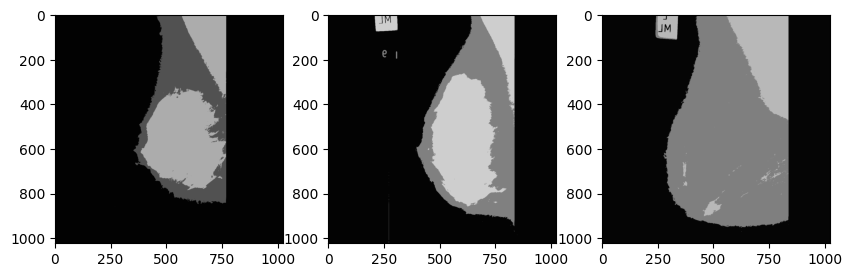

In [25]:
fig, axs = plt.subplots(1,3, figsize = (10,3))
im1 = axs[0].imshow(img_g_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)

plt.show()